# Sparkplug design
The gap length $d$ of the spark is related to the breakdown voltage $V_\mathrm{B}$ by Paschen's law [1]:
$$
    V_\mathrm{B} = \frac{Bpd}{\ln{(Apd)}-\ln{\left(\ln{\left(1+\frac{1}{\gamma_\mathrm{se}}\right)}\right)}}
$$
Where $p$ is the pressure, $\gamma_\mathrm{se}$ is the secondary-electron-emission coefficient, and $A$ and $B$ are (mostly) constants for a given gas, determined experimentally.

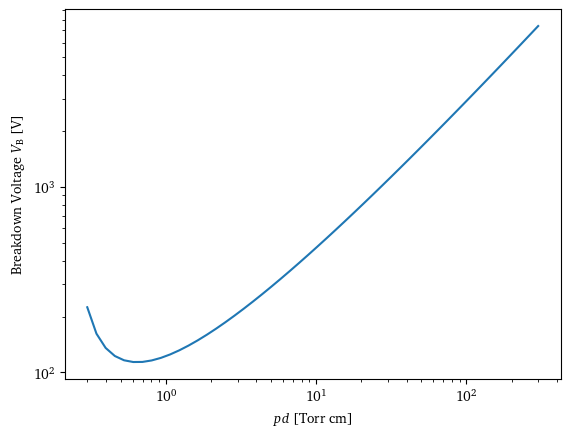

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as sciopt
from matplotlib import patheffects

pressures_Pa = np.array([1, 3, 5, 10, 15, 20]) * 1e5  # Pa
pressures_Torr = pressures_Pa/133.322  # Torr
distance = np.linspace(1,9) * 1e-1  # cm

# Parameters from Argon taken from [1,2]
A = 11.5  # cm^-1 Torr^-1
B = 176  # V cm^-1 Torr^-1
gamma_se = 0.07

# For air
# A = 112.50*0.133322
# B = 2737.5*0.133322

def paschen(pd):
    return (B*pd)/(np.log(A*pd)-np.log(np.log(1+1/gamma_se)))

# Replicating Fig 2. from [2] for validation
pds = np.logspace(-1, 2)*3
plt.loglog(pds, paschen(pds))
plt.xlabel('$pd$ [Torr cm]')
plt.ylabel(r'Breakdown Voltage $V_\mathrm{B}$ [V]')
plt.show()

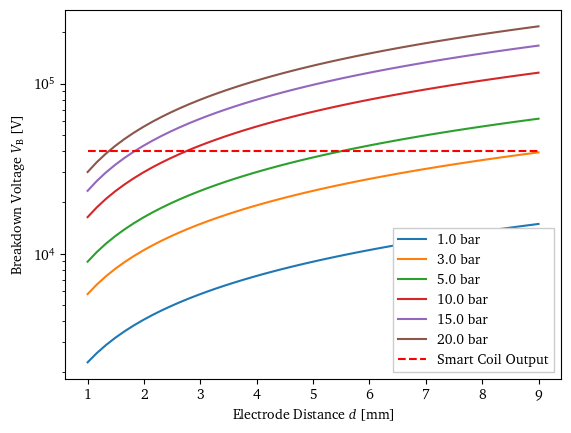

In [2]:

for pPa, pTorr in zip(pressures_Pa, pressures_Torr):
    plt.semilogy(distance*10, paschen(pTorr*distance), label='{} bar'.format(pPa/1e5))
plt.plot(distance*10, np.ones(distance.shape)*4e4, '--r', label='Smart Coil Output')
plt.legend()
plt.xlabel('Electrode Distance $d$ [mm]')
plt.ylabel(r'Breakdown Voltage $V_\mathrm{B}$ [V]')
plt.show()

# Spark Tests
On April 26, 2023, several spark tests were performed in pressurized Argon using two spark plug designs of different electrode gap. The same high-voltage coil was used. The electrode gap length is listed below:

| Small Sparkplug | Large Sparkplug |
|-----------------|-----------------|
| 4.75 mm         | 9.18 mm         |

Spark tests were performed at Argon pressures of 1, 3, 5, 10, 15, and 20 bar. Successful sparks are plotted below, where a spark is considered successful if the an arc is generated between the electrode tips (as opposed to no arcing, or arcing from an electrode to another part of the facility). Note that the sparkplugs appear to perform beyond the theoretical limit calculated by the Paschen curve. This is likely due to the choice of parameters $A$, $B$, $\gamma_\mathrm{se}$, which reflect a plane-parallel electrode geometry. The pointed electrodes used for the sparkplugs are more prone to arcing. Furthermore, [2] suggest that these Paschen parameters overestimate the necessary voltage for $pd > 10$ Torr cm.

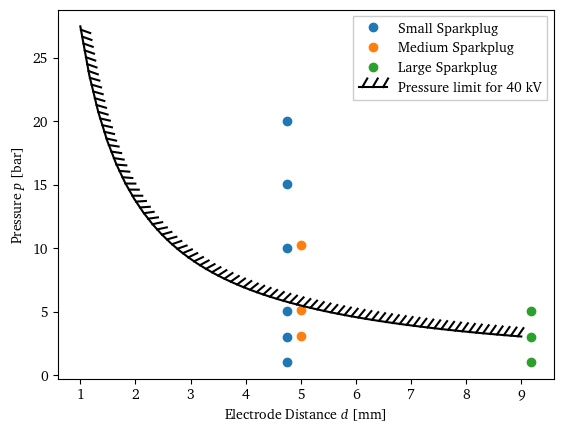

In [3]:
smallspark_data = pd.read_excel('../rawdata/LSPG_sparkTests.xlsx', usecols='A:B')
largespark_data = pd.read_excel('../rawdata/LSPG_sparkTests.xlsx', usecols='C:D')
midspark_data = pd.read_excel('../rawdata/LSPG_sparkTests.xlsx', usecols='E:F')

voltage = 40000  # Smart coil output voltage
pressure_limit_solution = sciopt.root(
    lambda p: paschen(p*distance)-voltage,
    x0=np.ones(distance.shape)*10e5/133.322
)

plt.plot(smallspark_data['Small Gap Size [mm]'], 
             smallspark_data['Actual Pressure Small [bar]'],
             'o', label='Small Sparkplug')
plt.plot(midspark_data['Mid Gap Size'], 
             midspark_data['Actual Pressure Mid [bar]'],
             'o', label='Medium Sparkplug')
plt.plot(largespark_data['Big Gap Size [mm]'], 
             largespark_data['Actual Pressure Big [bar]'],
             'o', label='Large Sparkplug')
plt.plot(distance*10, pressure_limit_solution.x*133.322/1e5, 'k', 
         path_effects=[patheffects.withTickedStroke(spacing=5, angle=60)],
         label='Pressure limit for {} kV'.format(int(voltage/1e3)))
plt.legend()
plt.xlabel('Electrode Distance $d$ [mm]')
plt.ylabel('Pressure $p$ [bar]')
plt.show()


## References
[1] Lieberman, Michael A., and Allan J. Lichtenberg. "Principles of plasma discharges and materials processing. A John Wiley & Sons." *Inc., Hoboken, NJ, USA* (2005).  
[2] Joseph G. Theis, Gregory R. Werner, Thomas G. Jenkins, and John R. Cary
, ["Computing the Paschen curve for argon with speed-limited particle-in-cell simulation"](https://doi.org/10.1063/5.0051095), Physics of Plasmas 28, 063513 (2021)

[Theis2021]: https://doi.org/10.1063/5.0051095 "Joseph G. Theis, Gregory R. Werner, Thomas G. Jenkins, and John R. Cary, \"Computing the Paschen curve for argon with speed-limited particle-in-cell simulation,\" Physics of Plasmas 28, 063513 (2021)"